In [1]:
# Imports all necessary packages and creates a file from the SMHS data.
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import uproot
import pandas as pd
import numpy as np
from numpy import nan as Nan
from sklearn import metrics
import time
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

file = uproot.open('/volatile/hallc/comm2017/mkjones/ROOTfiles/shms_coin_replay_production_all_4019_100000.root')
file.keys()

[b'Run_Data;2', b'TSP;1', b'T;1']

In [2]:
# Creates a tree from the 'T' key.
tree = file['T']
tree.keys()

[b'Ndata.P.dc.gtrack.plane',
 b'P.dc.gtrack.plane',
 b'Ndata.P.dc.gtrack.time',
 b'P.dc.gtrack.time',
 b'Ndata.P.dc.gtrack.wirenum',
 b'P.dc.gtrack.wirenum',
 b'Ndata.P.dc.hits.plane',
 b'P.dc.hits.plane',
 b'Ndata.P.dc.hits.time',
 b'P.dc.hits.time',
 b'Ndata.P.dc.hits.wirenum',
 b'P.dc.hits.wirenum',
 b'Event_Branch']

In [3]:
# Creates dataframe from 'T' tree.
df = tree.arrays(outputtype=pd.DataFrame)
df

b'Ndata.P.dc.gtrack.plane'  \
0                              12   
1                               0   
2                              12   
3                              12   
4                              12   
...                           ...   
85019                          12   
85020                           0   
85021                           0   
85022                          12   
85023                           0   

                                    b'P.dc.gtrack.plane'  \
0      [1.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 9.0, 10.0,...   
1                                                     []   
2      [1.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 9.0, 10.0,...   
3      [1.0, 3.0, 4.0, 5.0, 2.0, 6.0, 7.0, 9.0, 10.0,...   
4      [1.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 9.0, 10.0,...   
...                                                  ...   
85019  [1.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 9.0, 10.0,...   
85020                                                 []   
85021                                                 []   
85022  [1.0, 3.0, 4.0, 5.0, 6.0, 2.0, 7.0, 9.0, 10.0,...   
85023                                                 []   

       b'Ndata.P.dc.gtrack.time'  \
0                             12   
1                              0   
2                             12   
3                             12   
4                             12   
...                          ...   
85019                         12   
85020                          0   
85021                          0   
85022                         12   
85023                          0   

                                     b'P.dc.gtrack.time'  \
0      [46.28069214551451, 17.710705145514375, 75.819...   
1                                                     []   
2      [42.500448939470274, 70.03896893947041, 27.118...   
3      [67.15678114421715, 75.24085214421717, 32.4285...   
4      [23.48755329246081, 10.142197292460764, 89.868...   
...                                                  ...   
85019  [25.590323018818683, 43.22033601881881, 50.729...   
85020                                                 []   
85021                                                 []   
85022  [15.418924207500812, 77.60497520750081, 34.034...   
85023                                                 []   

       b'Ndata.P.dc.gtrack.wirenum'  \
0                                12   
1                                 0   
2                                12   
3                                12   
4                                12   
...                             ...   
85019                            12   
85020                             0   
85021                             0   
85022                            12   
85023                             0   

                                  b'P.dc.gtrack.wirenum'  \
0      [53.0, 30.0, 29.0, 45.0, 44.0, 53.0, 50.0, 25....   
1                                                     []   
2      [48.0, 49.0, 48.0, 69.0, 69.0, 47.0, 46.0, 48....   
3      [53.0, 33.0, 33.0, 49.0, 52.0, 49.0, 50.0, 29....   
4      [44.0, 14.0, 13.0, 38.0, 38.0, 44.0, 42.0, 10....   
...                                                  ...   
85019  [53.0, 30.0, 29.0, 45.0, 44.0, 53.0, 51.0, 27....   
85020                                                 []   
85021                                                 []   
85022  [99.0, 72.0, 71.0, 41.0, 40.0, 98.0, 105.0, 75...   
85023                                                 []   

       b'Ndata.P.dc.hits.plane'  \
0                            13   
1                            15   
2                            13   
3                            13   
4                            14   
...                         ...   
85019                        18   
85020                        30   
85021                        18   
85022                        14   
85023                        26   

                                      b'P.dc.hits.plane'  \
0      [1.0, 2.0

In [4]:
def array_creator(index):
    index

    plane1 = df[b'P.dc.gtrack.plane'][index]
    wirenum1 = df[b'P.dc.gtrack.wirenum'][index]

    plane2 = df[b'P.dc.hits.plane'][index]
    wirenum2 = df[b'P.dc.hits.wirenum'][index]
    
    value = len(plane2)
    list_1 = []
    list_2 = []
    list_3 = []
    list_4 = []
    list_5 = []
    list_6 = []
    list_7 = []
    list_8 = []
    list_9 = []
    list_10 = []
    list_11 = []
    list_12 = []
    final_list = []
    for i in range(value):
        if plane2[i] == 1:
            list_1.append(wirenum2[i])
            total_1 = sum(list_1)
            length_1 = len(list_1)
            final_val_1 = total_1 / length_1
            rounded_val_1 = round(final_val_1)
        if plane2[i] == 2:
            list_2.append(wirenum2[i])
            total_2 = sum(list_2)
            length_2 = len(list_2)
            final_val_2 = total_2 / length_2
            rounded_val_2 = round(final_val_2)
        if plane2[i] == 3:
            list_3.append(wirenum2[i])
            total_3 = sum(list_3)
            length_3 = len(list_3)
            final_val_3 = total_3 / length_3
            rounded_val_3 = round(final_val_3)
        if plane2[i] == 4:
            list_4.append(wirenum2[i])
            total_4 = sum(list_4)
            length_4 = len(list_4)
            final_val_4 = total_4 / length_4
            rounded_val_4 = round(final_val_4)
        if plane2[i] == 5:
            list_5.append(wirenum2[i])
            total_5 = sum(list_5)
            length_5 = len(list_5)
            final_val_5 = total_5 / length_5
            rounded_val_5 = round(final_val_5)
        if plane2[i] == 6:
            list_6.append(wirenum2[i])
            total_6 = sum(list_6)
            length_6 = len(list_6)
            final_val_6 = total_6 / length_6
            rounded_val_6 = round(final_val_6)
        if plane2[i] == 7:
            list_7.append(wirenum2[i])
            total_7 = sum(list_7)
            length_7 = len(list_7)
            final_val_7 = total_7 / length_7
            rounded_val_7 = round(final_val_7)
        if plane2[i] == 8:
            list_8.append(wirenum2[i])
            total_8 = sum(list_8)
            length_8 = len(list_8)
            final_val_8 = total_8 / length_8
            rounded_val_8 = round(final_val_8)
        if plane2[i] == 9:
            list_9.append(wirenum2[i])
            total_9 = sum(list_9)
            length_9 = len(list_9)
            final_val_9 = total_9 / length_9
            rounded_val_9 = round(final_val_9)
        if plane2[i] == 10:
            list_10.append(wirenum2[i])
            total_10 = sum(list_10)
            length_10 = len(list_10)
            final_val_10 = total_10 / length_10
            rounded_val_10 = round(final_val_10)
        if plane2[i] == 11:
            list_11.append(wirenum2[i])
            total_11 = sum(list_11)
            length_11 = len(list_11)
            final_val_11 = total_11 / length_11
            rounded_val_11 = round(final_val_11)
        if plane2[i] == 12:
            list_12.append(wirenum2[i])
            total_12 = sum(list_12)
            length_12 = len(list_12)
            final_val_12 = total_12 / length_12
            rounded_val_12 = round(final_val_12)
            
    final_list.append(int(rounded_val_1))
    final_list.append(int(rounded_val_2))
    final_list.append(int(rounded_val_3))
    final_list.append(int(rounded_val_4))
    final_list.append(int(rounded_val_5))
    final_list.append(int(rounded_val_6))
    final_list.append(int(rounded_val_7))
    final_list.append(int(rounded_val_8))
    final_list.append(int(rounded_val_9))
    final_list.append(int(rounded_val_10))
    final_list.append(int(rounded_val_11))
    final_list.append(int(rounded_val_12))
    
    return final_list

In [5]:
def chamber_graphic(final_list):
    t0 = time.time()
    
# Assigns wire-hit in each frame to a variable.
    u11_plane_value = final_list[0] #1st plane
    u12_plane_value = final_list[1] #2nd plane
    x11_plane_value = final_list[2] #3rd plane
    x12_plane_value = final_list[3] #4th plane
    v11_plane_value = final_list[4] #5th plane
    v12_plane_value = final_list[5] #6th plane
    u21_plane_value = final_list[6] #7st plane
    u22_plane_value = final_list[7] #8nd plane
    x21_plane_value = final_list[8] #9rd plane
    x22_plane_value = final_list[9] #10th plane
    v21_plane_value = final_list[10] #11th plane
    v22_plane_value = final_list[11] #12th plane
    
# Creates initial plot with set limits so only the wireframe chaber appears.
    plt.xlabel('Wirenumber')
    plt.xlim(xmin = -40, xmax = 40)
    plt.ylim(ymin = -40, ymax = 40)
    plt.gca().set_aspect('equal', adjustable='box')
    
#######################################################################################################################
# Assigns values that are key to marking correct wire.
    
    # Assigns 1u1-plane number variant.
    if u11_plane_value > 55:
        num1 = (55 - u11_plane_value)
    elif u11_plane_value < 55:
        num1 = (55 - u11_plane_value)
    elif u11_plane_value == 55:
        num1 = 0
    
    # Assigns 1x1-plane number variant.
    if x11_plane_value > 40:
        num2 = (40 - x11_plane_value)
    elif x11_plane_value < 40:
        num2 = (40 - x11_plane_value)
    elif x11_plane_value == 40:
        num2 = 0
    
    # Assigns 1v1-plane number variant.
    if v11_plane_value > 55:
        num3 = (55 - v11_plane_value)
    elif v11_plane_value < 55:
        num3 = (55 - v11_plane_value)
    elif v11_plane_value == 55:
        num3 = 0
        
    # Assigns 1u2-plane number variant.
    if u12_plane_value > 55:
        num4 = (55 - u12_plane_value)
    elif u12_plane_value < 55:
        num4 = (55 - u12_plane_value)
    elif u12_plane_value == 55:
        num4 = 0
    
    # Assigns 1x2-plane number variant.
    if x12_plane_value > 40:
        num5 = (40 - x12_plane_value)
    elif x12_plane_value < 40:
        num5 = (40 - x12_plane_value)
    elif x12_plane_value == 40:
        num5 = 0
    
    # Assigns 1v2-plane number variant.
    if v12_plane_value > 55:
        num6 = (55 - v12_plane_value)
    elif v12_plane_value < 55:
        num6 = (55 - v12_plane_value)
    elif v12_plane_value == 55:
        num6 = 0

    # Assigns 2u1-plane number variant.
    if u21_plane_value > 55:
        num7 = (55 - u21_plane_value)
    elif u21_plane_value < 55:
        num7 = (55 - u21_plane_value)
    elif u21_plane_value == 55:
        num7 = 0
    
    # Assigns 2x1-plane number variant.
    if x21_plane_value > 40:
        num8 = (40 - x21_plane_value)
    elif x21_plane_value < 40:
        num8 = (40 - x21_plane_value)
    elif x21_plane_value == 40:
        num8 = 0
    
    # Assigns 2v1-plane number variant.
    if v21_plane_value > 55:
        num9 = (55 - v21_plane_value)
    elif v21_plane_value < 55:
        num9 = (55 - v21_plane_value)
    elif v21_plane_value == 55:
        num9 = 0
        
    # Assigns 2u2-plane number variant.
    if u22_plane_value > 55:
        num10 = (55 - u22_plane_value)
    elif u22_plane_value < 55:
        num10 = (55 - u22_plane_value)
    elif u22_plane_value == 55:
        num10 = 0
    
    # Assigns 2x2-plane number variant.
    if x22_plane_value > 40:
        num11 = (40 - x22_plane_value)
    elif x22_plane_value < 40:
        num11 = (40 - x22_plane_value)
    elif x22_plane_value == 40:
        num11 = 0
    
    # Assigns 2v2-plane number variant.
    if v22_plane_value > 55:
        num12 = (55 - v22_plane_value)
    elif v22_plane_value < 55:
        num12 = (55 - v22_plane_value)
    elif v22_plane_value == 55:
        num12 = 0
        
#######################################################################################################################
# Marks hit wires.    
    
    # Marks correct 1u1-plane wire red.
    x1 = np.linspace(-100,100)
    y1 = -(1.1255751154673213)*x1 + ((1.5056292174899082 * num1) + 1.1292219131174313)
    plt.plot(x1, y1, 'r-')
    
    # Marks correct 1x1-plane wire red.
    plt.plot([-80, 80],[num2 - .25, num2 - .25], 'r-')
    
    # Marks correct 1v1-plane wire red.
    x2 = np.linspace(-100,100)
    y2 = (1.1255751154673213)*x2 + ((1.5056292174899082 * num3) + 1.1292219131174313)
    plt.plot(x2, y2, 'r-')
    
    # Marks correct 1u2-plane wire red.
    x3 = np.linspace(-100,100)
    y3 = -(1.1255751154673213)*x3 + ((1.5056292174899082 * num4) + 1.8820365218623851)
    plt.plot(x3, y3, 'g-')
    
    # Marks correct 1x2-plane wire red.
    plt.plot([-80, 80],[num5 + .25, num5 + .25], 'g-')
    
    # Marks correct 1v2-plane wire red.
    x4 = np.linspace(-100,100)
    y4 = (1.1255751154673213)*x4 + ((1.5056292174899082 * num6) + 1.8820365218623851)
    plt.plot(x4, y4, 'g-')
    
    # Marks correct 2u1-plane wire red.
    x5 = np.linspace(-100,100)
    y5 = -(1.1255751154673213)*x5 + ((1.5056292174899082 * num7) + 1.8820365218623851)
    plt.plot(x5, y5, 'y-')
    
    # Marks correct 2x1-plane wire red.
    plt.plot([-80, 80],[num8 + .25, num8 + .25], 'y-')
    
    # Marks correct 2v1-plane wire red.
    x6 = np.linspace(-100,100)
    y6 = (1.1255751154673213)*x6 + ((1.5056292174899082 * num9) + 1.8820365218623851)
    plt.plot(x6, y6, 'y-')
    
    # Marks correct 2u2-plane wire red.
    x7 = np.linspace(-100,100)
    y7 = -(1.1255751154673213)*x7 + ((1.5056292174899082 * num10) + 1.1292219131174313)
    plt.plot(x7, y7, 'b-')
    
    # Marks correct 2x2-plane wire red.
    plt.plot([-80, 80],[num11 - .25, num11 + .25], 'b-')
    
    # Marks correct 2v2-plane wire red.
    x8 = np.linspace(-100,100)
    y8 = (1.1255751154673213)*x8 + ((1.5056292174899082 * num12) + 1.1292219131174313)
    plt.plot(x8, y8, 'b-')
    
###############################################################    

    # Makes plot bigger.
    fig = plt.gcf()
    fig.set_size_inches(18, 18)
    
    # Shows number variants and plot.
    print('CHAMBER GRAPHIC')
    plt.show()
    t1 = time.time()
    total = t1-t0
    '''print('Time for code to run:', total)'''

In [6]:
def main_combined(index):
    final_list = array_creator(index)
    chamber_graphic(final_list)

In [7]:
def chamber_graphic_first_chamber(u1_plane_value, u2_plane_value, x1_plane_value, 
                                  x2_plane_value, v1_plane_value, v2_plane_value):
    # Assigns wire-hit in each frame to a variable.
    u1_plane_value #1st plane
    u2_plane_value #2nd plane
    x1_plane_value #3rd plane
    x2_plane_value #4th plane
    v1_plane_value #5th plane
    v2_plane_value #6th plane
    
    # Creates initial plot with set limits so only the wireframe chaber appears.
    plt.xlabel('Wirenumber')
    plt.xlim(xmin = -40, xmax = 40)
    plt.ylim(ymin = -40, ymax = 40)
    plt.gca().set_aspect('equal', adjustable='box')
    
#######################################################################################################################
# Creates wireframe that will be marked in red corresponding to hits.
    
    for i in range(56):
        '''
        # Creates u-plane wireframe.
        x = np.linspace(-100,100)
        y_pos = -(1.1255751154673213)*x + ((1.5056292174899082 * i))
        plt.plot(x, y_pos, 'b:')
        y_neg = -(1.1255751154673213)*x + ((1.5056292174899082 * -i))
        plt.plot(x, y_neg, 'b:')    
        
        # Creates x-plane wireframe.
        plt.plot([-80, 80],[-i, -i], 'b:')
        plt.plot([-80, 80],[i, i], 'b:')
        
        # Creates v-plane wireframe.
        x = np.linspace(-100,100)
        y_pos = (1.1255751154673213)*x + ((1.5056292174899082 * i))
        plt.plot(x, y_pos, 'b:')
        y_neg = (1.1255751154673213)*x + ((1.5056292174899082 * -i))
        plt.plot(x, y_neg, 'b:')
'''    
#######################################################################################################################
# Assigns values that are key to marking correct wire.
    
    # Assigns u1-plane number variant.
    if u1_plane_value > 55:
        num1 = (55 - u1_plane_value)
    elif u1_plane_value < 55:
        num1 = (55 - u1_plane_value)
    elif u1_plane_value == 55:
        num1 = 0
    
    # Assigns x1-plane number variant.
    if x1_plane_value > 40:
        num2 = (40 - x1_plane_value)
    elif x1_plane_value < 40:
        num2 = (40 - x1_plane_value)
    elif x1_plane_value == 40:
        num2 = 0
    
    # Assigns v1-plane number variant.
    if v1_plane_value > 55:
        num3 = (55 - v1_plane_value)
    elif v1_plane_value < 55:
        num3 = (55 - v1_plane_value)
    elif v1_plane_value == 55:
        num3 = 0
        
    
    
    # Assigns u2-plane number variant.
    if u2_plane_value > 55:
        num4 = (55 - u2_plane_value)
    elif u2_plane_value < 55:
        num4 = (55 - u2_plane_value)
    elif u2_plane_value == 55:
        num4 = 0
    
    # Assigns x2-plane number variant.
    if x2_plane_value > 40:
        num5 = (40 - x2_plane_value)
    elif x2_plane_value < 40:
        num5 = (40 - x2_plane_value)
    elif x2_plane_value == 40:
        num5 = 0
    
    # Assigns v2-plane number variant.
    if v2_plane_value > 55:
        num6 = (55 - v2_plane_value)
    elif v2_plane_value < 55:
        num6 = (55 - v2_plane_value)
    elif v2_plane_value == 55:
        num6 = 0
    
#######################################################################################################################
# Marks hit wires.    
    
    # Marks correct 1u1-plane wire red.
    x1 = np.linspace(-100,100)
    y1 = -(1.1255751154673213)*x1 + ((1.5056292174899082 * num1) + 1.1292219131174313)
    plt.plot(x1, y1, 'r-')
    
    # Marks correct 1x1-plane wire red.
    plt.plot([-80, 80],[num2 - .25, num2 - .25], 'r-')
    
    # Marks correct 1v1-plane wire red.
    x2 = np.linspace(-100,100)
    y2 = (1.1255751154673213)*x2 + ((1.5056292174899082 * num3) + 1.1292219131174313)
    plt.plot(x2, y2, 'r-')
    
    
    
    # Marks correct 1u2-plane wire red.
    x3 = np.linspace(-100,100)
    y3 = -(1.1255751154673213)*x3 + ((1.5056292174899082 * num4) + 1.8820365218623851)
    plt.plot(x3, y3, 'g-')
    
    # Marks correct 1x2-plane wire red.
    plt.plot([-80, 80],[num5 + .25, num5 + .25], 'g-')
    
    # Marks correct 1v2-plane wire red.
    x4 = np.linspace(-100,100)
    y4 = (1.1255751154673213)*x4 + ((1.5056292174899082 * num6) + 1.8820365218623851)
    plt.plot(x4, y4, 'g-')
    
###############################################################    
    
    # Makes plot bigger.
    fig = plt.gcf()
    fig.set_size_inches(18, 18)
    
    # Shows number variants and plot.
    print('FIRST CHAMBER')
    print('WIRENUMBER - ', 'U1:', u1_plane_value, '', 'X1:', x1_plane_value, '', 'V1:', v1_plane_value, 'U2:', u2_plane_value, '', 'X2:', x2_plane_value, '', 'V2:', v2_plane_value)
    print('VARIANTS - ', 'U1:', num1, '', 'X1:', num2, '', 'V1:', num3, 'U2:', num4, '', 'X2:', num5, '', 'V2:', num6)
    plt.show()

In [8]:
def chamber_graphic_second_chamber(u1_plane_value, u2_plane_value, x1_plane_value, 
                                  x2_plane_value, v1_plane_value, v2_plane_value):
    # Assigns wire-hit in each frame to a variable.
    u1_plane_value #7th plane
    u2_plane_value #8th plane
    x1_plane_value #9th plane
    x2_plane_value #10th plane
    v1_plane_value #11th plane
    v2_plane_value #12th plane
    
    # Creates initial plot with set limits so only the wireframe chaber appears.
    plt.xlabel('Wirenumber')
    plt.xlim(xmin = -40, xmax = 40)
    plt.ylim(ymin = -40, ymax = 40)
    plt.gca().set_aspect('equal', adjustable='box')
    
#######################################################################################################################
# Creates wireframe that will be marked in red corresponding to hits.
    
    for i in range(56):
        '''
        # Creates u-plane wireframe.
        x = np.linspace(-100,100)
        y_pos = -(1.1255751154673213)*x + ((1.5056292174899082 * i))
        plt.plot(x, y_pos, 'b:')
        y_neg = -(1.1255751154673213)*x + ((1.5056292174899082 * -i))
        plt.plot(x, y_neg, 'b:')    
        
        # Creates x-plane wireframe.
        plt.plot([-80, 80],[-i, -i], 'b:')
        plt.plot([-80, 80],[i, i], 'b:')
        
        # Creates v-plane wireframe.
        x = np.linspace(-100,100)
        y_pos = (1.1255751154673213)*x + ((1.5056292174899082 * i))
        plt.plot(x, y_pos, 'b:')
        y_neg = (1.1255751154673213)*x + ((1.5056292174899082 * -i))
        plt.plot(x, y_neg, 'b:')
'''    
#######################################################################################################################
# Assigns values that are key to marking correct wire.
    
    # Assigns u1-plane number variant.
    if u1_plane_value > 55:
        num1 = (55 - u1_plane_value)
    elif u1_plane_value < 55:
        num1 = (55 - u1_plane_value)
    elif u1_plane_value == 55:
        num1 = 0
    
    # Assigns x1-plane number variant.
    if x1_plane_value > 40:
        num2 = (40 - x1_plane_value)
    elif x1_plane_value < 40:
        num2 = (40 - x1_plane_value)
    elif x1_plane_value == 40:
        num2 = 0
    
    # Assigns v1-plane number variant.
    if v1_plane_value > 55:
        num3 = (55 - v1_plane_value)
    elif v1_plane_value < 55:
        num3 = (55 - v1_plane_value)
    elif v1_plane_value == 55:
        num3 = 0
        
    
    
    # Assigns u2-plane number variant.
    if u2_plane_value > 55:
        num4 = (55 - u2_plane_value)
    elif u2_plane_value < 55:
        num4 = (55 - u2_plane_value)
    elif u2_plane_value == 55:
        num4 = 0
    
    # Assigns x2-plane number variant.
    if x2_plane_value > 40:
        num5 = (40 - x2_plane_value)
    elif x2_plane_value < 40:
        num5 = (40 - x2_plane_value)
    elif x2_plane_value == 40:
        num5 = 0
    
    # Assigns v2-plane number variant.
    if v2_plane_value > 55:
        num6 = (55 - v2_plane_value)
    elif v2_plane_value < 55:
        num6 = (55 - v2_plane_value)
    elif v2_plane_value == 55:
        num6 = 0
    
#######################################################################################################################
# Marks hit wires.    
    
    # Marks correct 2u1-plane wire red.
    x1 = np.linspace(-100,100)
    y1 = -(1.1255751154673213)*x1 + ((1.5056292174899082 * num1) + 1.8820365218623851)
    plt.plot(x1, y1, 'y-')
    
    # Marks correct 2x1-plane wire red.
    plt.plot([-80, 80],[num2 + .25, num2 + .25], 'y-')
    
    # Marks correct 2v1-plane wire red.
    x2 = np.linspace(-100,100)
    y2 = (1.1255751154673213)*x2 + ((1.5056292174899082 * num3) + 1.8820365218623851)
    plt.plot(x2, y2, 'y-')
    
    
    
    # Marks correct 2u2-plane wire red.
    x3 = np.linspace(-100,100)
    y3 = -(1.1255751154673213)*x3 + ((1.5056292174899082 * num4) + 1.1292219131174313)
    plt.plot(x3, y3, 'b-')
    
    # Marks correct 2x2-plane wire red.
    plt.plot([-80, 80],[num5 - .25, num5 + .25], 'b-')
    
    # Marks correct 2v2-plane wire red.
    x4 = np.linspace(-100,100)
    y4 = (1.1255751154673213)*x4 + ((1.5056292174899082 * num6) + 1.1292219131174313)
    plt.plot(x4, y4, 'b-')
    
###############################################################    
    
    # Makes plot bigger.
    fig = plt.gcf()
    fig.set_size_inches(18, 18)
    
    # Shows number variants and plot.
    print('SECOND CHAMBER')
    print('WIRENUMBER - ', 'U1:', u1_plane_value, '', 'X1:', x1_plane_value, '', 'V1:', v1_plane_value, 'U2:', u2_plane_value, '', 'X2:', x2_plane_value, '', 'V2:', v2_plane_value)
    print('VARIANTS - ', 'U1:', num1, '', 'X1:', num2, '', 'V1:', num3, 'U2:', num4, '', 'X2:', num5, '', 'V2:', num6)
    plt.show()

In [9]:
def main_both(index):
    t0 = time.time()
    final_list = array_creator(index)
    plane1 = final_list[0] #1st plane
    plane2 = final_list[1] #2nd plane
    plane3 = final_list[2] #3rd plane
    plane4 = final_list[3] #4th plane
    plane5 = final_list[4] #5th plane
    plane6 = final_list[5] #6th plane
    plane7 = final_list[6] #7st plane
    plane8 = final_list[7] #8nd plane
    plane9 = final_list[8] #9rd plane
    plane10 = final_list[9] #10th plane
    plane11 = final_list[10] #11th plane
    plane12 = final_list[11] #12th plane
    chamber_graphic_first_chamber(plane1, plane2, plane3,
                                  plane4, plane5, plane6)
    chamber_graphic_second_chamber(plane7, plane8, plane9,
                                  plane10, plane11, plane12)
    t1 = time.time()
    total = t1-t0
    '''print('Time for code to run:', total)'''

In [10]:
def main_all(index):
    t0 = time.time()
    
    main_both(index)
    main_combined(index)
    
    t1 = time.time()
    total = t1-t0
    print('Time for code to run:', total)

FIRST CHAMBER
WIRENUMBER -  U1: 53  X1: 33  V1: 49 U2: 52  X2: 33  V2: 48
VARIANTS -  U1: 2  X1: 7  V1: 6 U2: 3  X2: 7  V2: 7


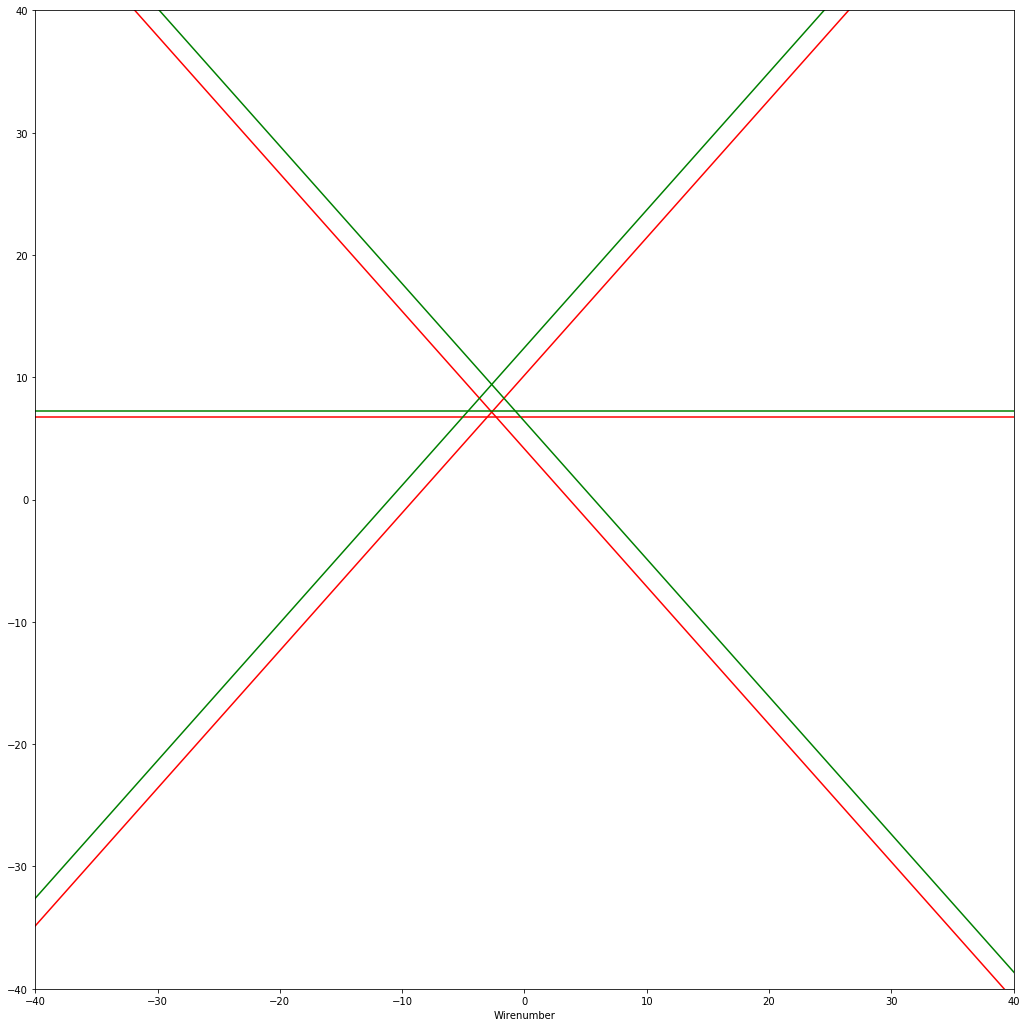

SECOND CHAMBER
WIRENUMBER -  U1: 50  X1: 29  V1: 47 U2: 50  X2: 30  V2: 48
VARIANTS -  U1: 5  X1: 11  V1: 8 U2: 5  X2: 10  V2: 7


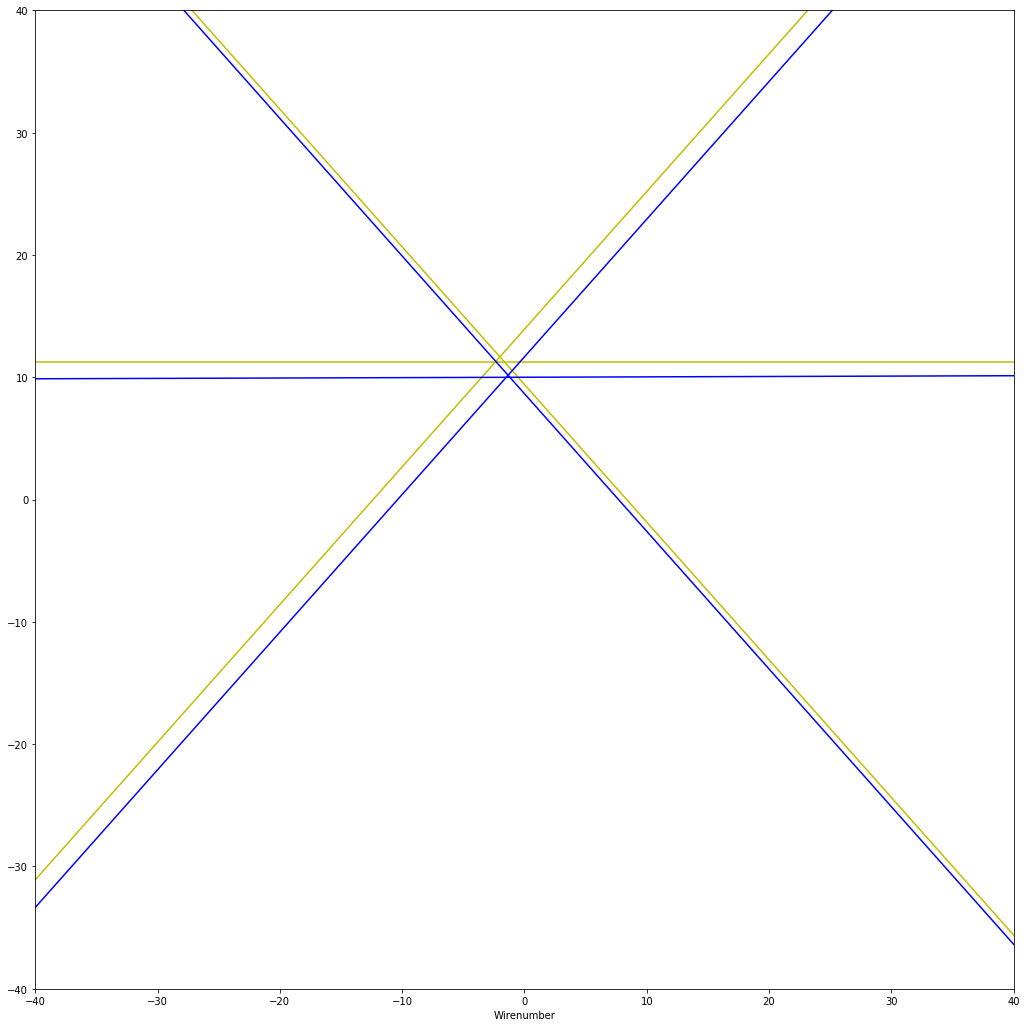

CHAMBER GRAPHIC


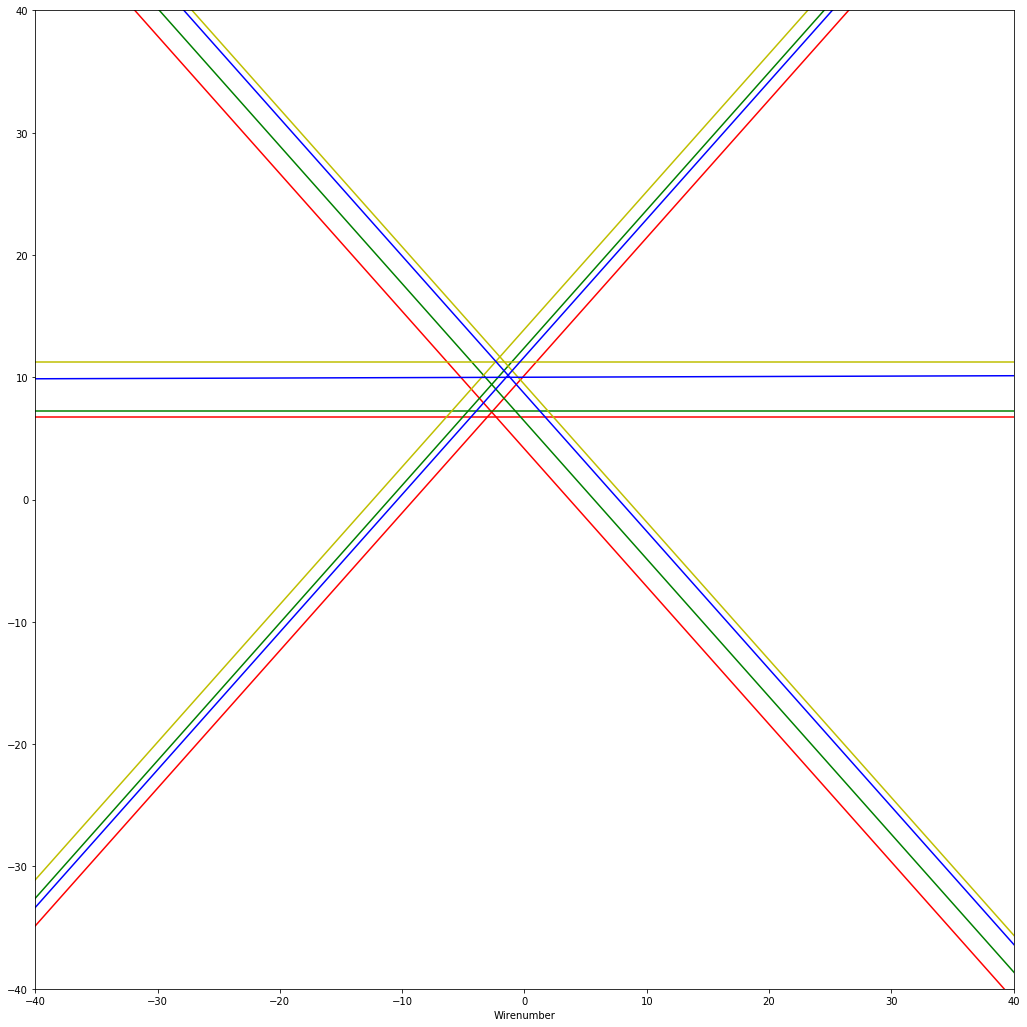

Time for code to run: 2.7640392780303955


In [12]:
main_all(3)